In [74]:

import pandas as pd
import os

import matplotlib.pyplot as plt

os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))
os.listdir(os.getcwd())



['home',
 'usr',
 'bin',
 'sbin',
 '.file',
 'etc',
 'var',
 'Library',
 'System',
 '.VolumeIcon.icns',
 'private',
 '.vol',
 'Users',
 'Applications',
 'opt',
 'dev',
 'Volumes',
 'tmp',
 'cores']

In [75]:
l = list(os.listdir("Users/kelvin/AP_Participation_Raw_Data/"))

In [76]:
import pandas as pd
df_cs = pd.DataFrame()
cs = []
for files in l: #for files in AP_Participation_Raw_Data
    if files.startswith("ap_participation"):
        df = pd.read_excel("Users/kelvin/AP_Participation_Raw_Data/" + files, thousands=',')
        
        if not df.empty:  # Check if the DataFrame is not empty
            df.columns = df.iloc[0]
            cols = []
            df = df[1:]
            for j in df.columns:
                if j not in ['District Name', 'District Code']:
                    df[j] = df[j].fillna(0)
                    df[j] = df[j].astype(float)
                    df[j] = df[j].astype(int)
           
            student_group = files.split("-")[1]
            student_group = student_group.split("_")[0]
        
            df['Student Group'] = student_group
            year = files.split("_")[2]
            year = year.split(".")[0]
            if year == '20':
                df['Year'] = 2021
            if year == '21':
                df['Year'] = 2022
            df_cs = pd.concat([df_cs, df])
            #cs.append(df)
            
df_cs = df_cs.reset_index(drop=True)
print(df_cs)

0                                         District Name District Code  \
0                                      Acton-Boxborough      06000000   
1     Advanced Math and Science Academy Charter (Dis...      04300000   
2                                                Agawam      00050000   
3                                              Amesbury      00070000   
4                                        Amherst-Pelham      06050000   
...                                                 ...           ...   
5670                                            Webster      03160000   
5671                                           Westford      03260000   
5672                                           Weymouth      03360000   
5673                                             Woburn      03470000   
5674                                       State Totals      00000000   

0     Tests Takers  Tests Taken  One Test  Two Tests  Three Tests  Four Tests  \
0               20           52         6 

Text(0.5, 1.0, 'Student Groups v. Test Takers')

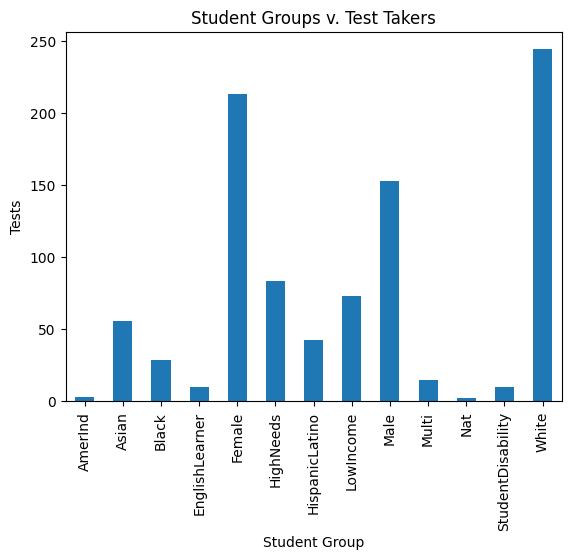

In [77]:
test_takersgraph = df_cs.groupby('Student Group')['Tests Takers'].mean()
test_takersgraph.plot(kind='bar')
plt.ylabel('Tests')
plt.title('Student Groups v. Test Takers')

Text(0.5, 1.0, 'Student Groups v. Tests Taken')

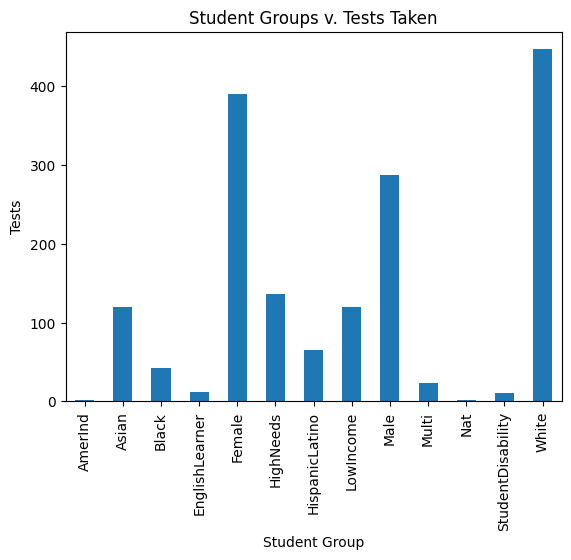

In [78]:
test_takengraph = df_cs.groupby('Student Group')['Tests Taken'].mean()
test_takengraph.plot(kind='bar')
plt.ylabel('Tests')
plt.title('Student Groups v. Tests Taken')

Text(0.5, 1.0, 'Student Groups v. Took One Test')

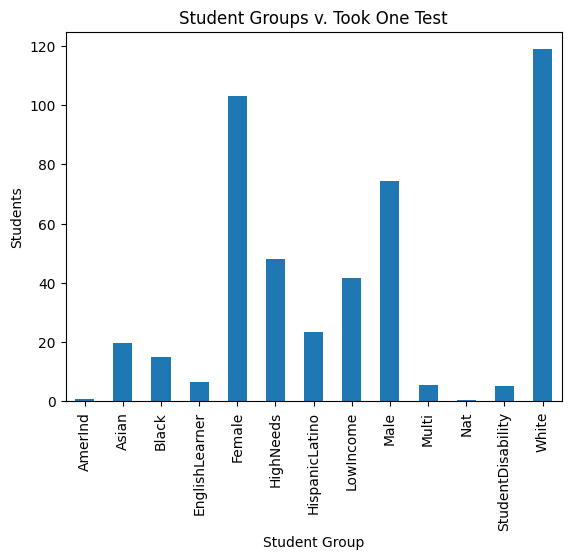

In [79]:
test_onegraph = df_cs.groupby('Student Group')['One Test'].mean()
test_onegraph.plot(kind='bar')
plt.ylabel('Students')
plt.title('Student Groups v. Took One Test')

Text(0.5, 1.0, 'Student Groups v. Took Two Tests')

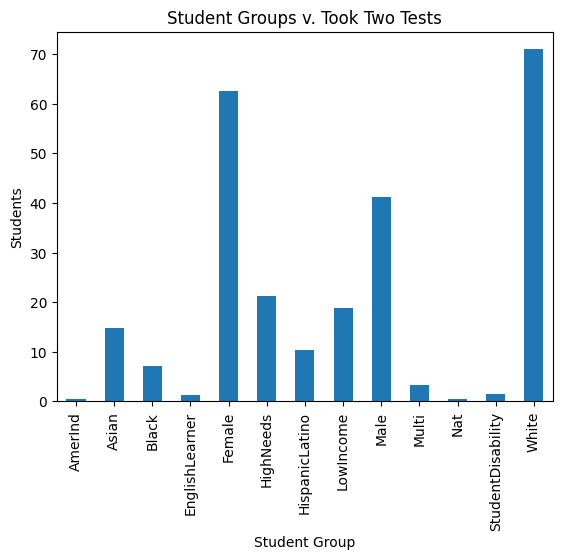

In [80]:
test_twograph = df_cs.groupby('Student Group')['Two Tests'].mean()
test_twograph.plot(kind='bar')
plt.ylabel('Students')
plt.title('Student Groups v. Took Two Tests')

Text(0.5, 1.0, 'Student Groups v. Took Three Tests')

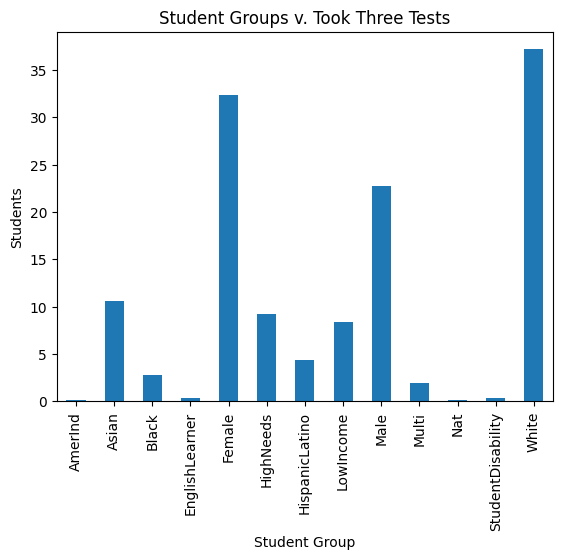

In [81]:
test_threegraph = df_cs.groupby('Student Group')['Three Tests'].mean()
test_threegraph.plot(kind='bar')
plt.ylabel('Students')
plt.title('Student Groups v. Took Three Tests')

Text(0.5, 1.0, 'Student Groups v. Took Four Tests')

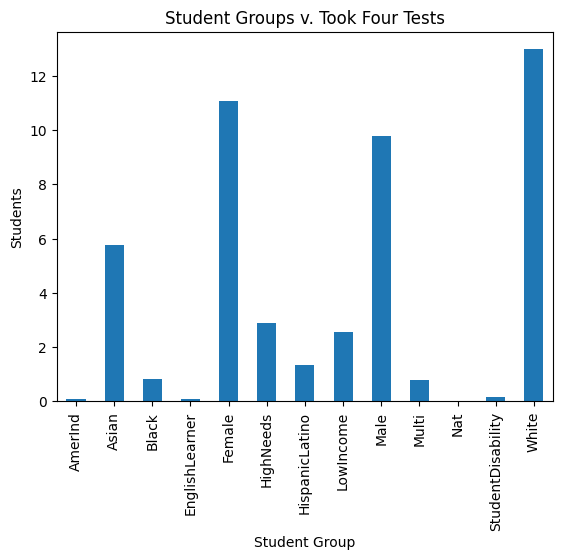

In [82]:
test_fourgraph = df_cs.groupby('Student Group')['Four Tests'].mean()
test_fourgraph.plot(kind='bar')
plt.ylabel('Students')
plt.title('Student Groups v. Took Four Tests')

Text(0.5, 1.0, 'Student Groups v. Took Five or More Tests')

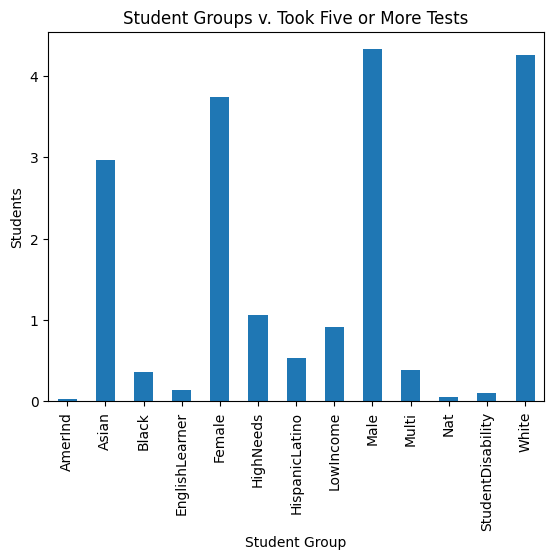

In [83]:
test_fiveplusgraph = df_cs.groupby('Student Group')['Five or More Tests'].mean()
test_fiveplusgraph.plot(kind='bar')
plt.ylabel('Students')
plt.title('Student Groups v. Took Five or More Tests')